## **Лабораторна робота №2**

##### Виконав студент групи МІТ-31 __Черевач Юрій__

**Частина 1:** __Регресія на згенерованому наборі даних__
1. Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.
2. Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.
3. Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

            0         1         2         3         4         5         6
0   -0.730263 -0.417809  0.087104 -0.943580  0.791289  0.503729 -1.255791
1    1.597730  0.809186  0.029549 -1.037692  0.741226 -0.064151 -1.485166
2    0.952359  1.452843  0.556577 -1.899946  0.350010 -1.944623  0.699047
3   -1.184429 -0.155764 -1.202280  0.703813  0.161528 -1.465368  2.398384
4    0.036596 -0.110381  0.400807  0.346059  0.137952  0.330954 -0.638327
..        ...       ...       ...       ...       ...       ...       ...
995 -0.629922  1.376149  0.252646 -0.610791 -0.506666  0.402245  0.208945
996 -0.468639 -0.254849  1.617946  1.217937 -1.416211  0.681758  0.370383
997 -2.030424  0.185418  0.429361  0.709735  1.476653  1.535711 -1.870565
998  0.110960 -1.271918 -0.647990  1.235784  0.021910 -0.769798 -1.629328
999 -0.585217 -0.183385 -0.241417 -1.509461 -0.526670 -1.304894  0.895569

[1000 rows x 7 columns]
MSE: 3912.39076235804
R^2: 0.7754806340974806


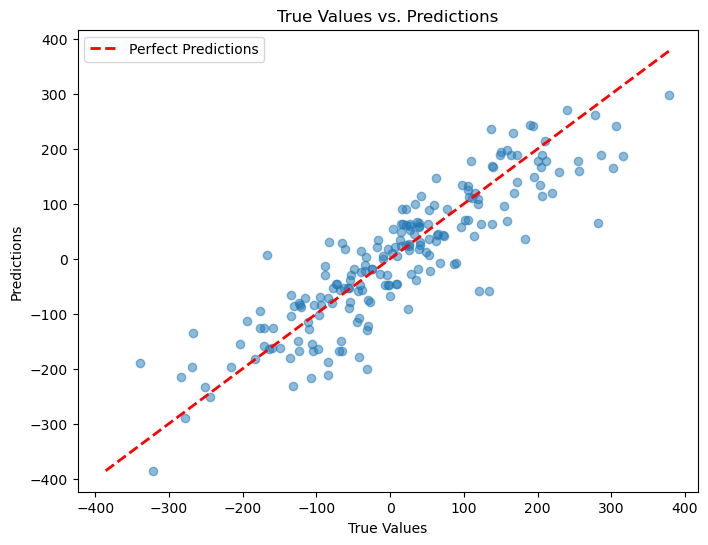

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000, n_features=7, noise=0.1)

df = pd.DataFrame(X)

print(df)

#розділяємо дані на тестовий та навчальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#cтворюємо модель
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

#візуалізовую дані
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label="Perfect Predictions")

plt.legend()
plt.show()





Частину першу вважаю виконаною.

**Частина 2: Аналіз часових даних**

Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

Завантажте та візуалізуйте ці дані. Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.

 Для аналізу я вирішив використати датасет з даними про ціни на акції Тесла. Планую вивести на екран для наочності ці дані у вигляді графіка. Також для обробки даних я буду використовувати бібліотеку `statsmodels`

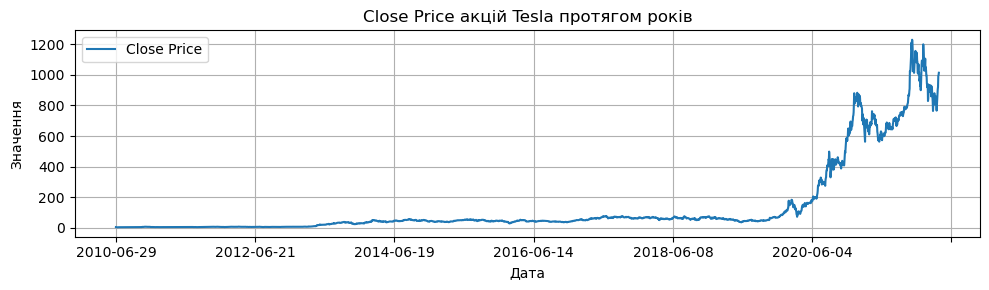

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800
2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400
2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400


In [28]:
# зчитую дані
df = pd.read_csv("TSLA.csv", index_col='Date')

# виводжу ціну, яка мене цікавить на графік
plt.figure(figsize=(10, 3))
df['Close'].plot()
plt.ylabel("Значення")
plt.xlabel("Дата")
plt.title("Close Price акцій Tesla протягом років")
plt.legend(['Close Price'])
plt.tight_layout()
plt.grid()
plt.show()

#вивід перших і останніх п'яти значень датасету
df.head(-5)

Дані у наборі за 12 років, по графіку помітно, що акції почали зростати наприкінці 2019 року. Зараз на основі цих даних я спробую дослідити тренд, виявити сезонність і тд.

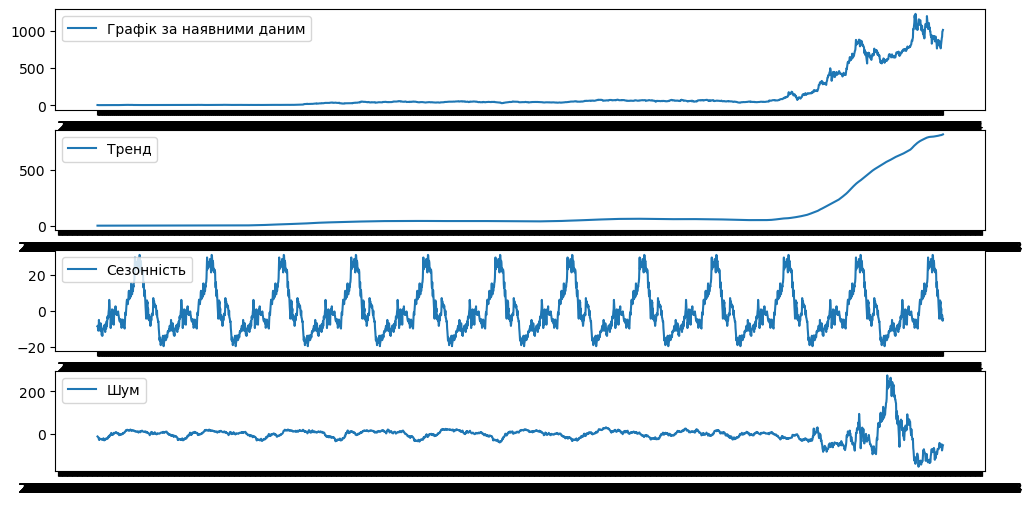

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# розкладання на компоненти
result = seasonal_decompose(df['Close'], model='additive', period=252)  # період сезонності, наприклад, 252 дні торгів на рік

#виведення графіків
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Графік за наявними даним')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Сезонність')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Шум')
plt.legend()

plt.show()